# Titanic Survivor Prediction - Classification Problem 

## 1. Import the important libraries.

In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
titanic_df = pd.read_csv('data/titanic_all_numeric.csv')
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [4]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [12]:
y = titanic_df['survived']
X = titanic_df.drop(columns="survived")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)


In [13]:
print(y_train)

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 712, dtype: int64


## 2. One Hot Encoding for the Target Variable: Survived

In [14]:
# One-hot encode the target variable# Convert to TensorFlow tensors
predictors = tf.convert_to_tensor(X_train, dtype=tf.float32)
target = to_categorical(y_train)

n_cols = predictors.shape[1]
print(target)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


## 3. Specify model architecture and Fit the model

In [15]:
model = Sequential()

model.add(Dense(32, activation="relu", input_shape = (n_cols, )))
model.add(Dense(2, activation="softmax"))

/opt/homebrew/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4. Compile the Model

- Optimizer
- Loss Function
- Metric to display 

In [16]:
model.compile(optimizer="sgd", loss = "categorical_crossentropy", metrics=['accuracy'])

## 5. Fit the Model

In [17]:
model.fit(predictors, target)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5600 - loss: 4.4567


## 6. Making predictions

In [18]:
predictions = model.predict(X_test)
predicted_probs_survived = predictions[:, 1]

print(predicted_probs_survived)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0.2602508  0.16831453 0.25718954 0.7863877  0.42688838 0.98600197
 0.16354205 0.58266747 0.29755965 0.7286186  0.9680641  0.11758619
 0.37571687 0.2103135  0.12821768 0.87040216 0.9320459  0.16300622
 0.20852366 0.7430393  0.22872962 0.29312506 0.25239843 0.25284094
 0.1890907  0.7305835  0.24944429 0.16027406 0.7564856  0.15362698
 0.26500744 0.20594229 0.5912045  0.15354411 0.27117702 0.27342996
 0.83401126 0.16354205 0.5692762  0.18171756 0.9760877  0.22493826
 0.18058501 0.1958139  0.09254353 0.7188869  0.26248333 0.22404665
 0.23620196 0.9989255  0.71259564 0.99753153 0.25978324 0.9973033
 0.06182076 0.97663325 0.16291471 0.9999981  0.17422152 0.25131154
 0.25118932 0.6916175  0.3925134  0.3748245  0.1958139  0.05734893
 0.971529   0.19625542 0.38700393 0.9966774  0.44863883 0.99999917
 0.74178886 0.99405915 0.23606788 0.14003432 0.16842005 0.9358721
 0.09846408 0.11589389 0.87176794 0.14945251 0.99947065 0.19591133
 0.10064741 0.11514702 0.9

## 7. Saving the Model

In [19]:
model.save('titanic_classifier_keras.h5')

from tensorflow.keras.models import load_model

my_model = load_model('titanic_classifier_keras.h5')
my_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420 (1.64 KB)

 Trainable params: 418 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## 8. Optimizing the Model

- Iterating over different learning rates.

In [20]:
def get_new_model():
    model = Sequential()
    model.add(Dense(32, activation="relu", input_shape = (n_cols, )))
    model.add(Dense(2, activation="softmax"))
    
    return model

In [26]:
from tensorflow.keras.optimizers import SGD # type: ignore

learning_rates = [0.000001, 0.01, 1]

for rate in learning_rates:
    model = get_new_model()
    optimizer_lr = SGD(learning_rate = float(rate))
    model.compile(optimizer = optimizer_lr, loss= "categorical_crossentropy")
    model.fit(predictors, target)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 2.5533
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 4.8047
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 465.7962


### Validation Split in Neural Network

In [27]:
model = get_new_model()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

hist = model.fit(predictors, target, validation_split= 0.3)


/opt/homebrew/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6884 - loss: 2.0867 - val_accuracy: 0.6636 - val_loss: 1.5453


### Early Stopping Condition

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

model = get_new_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_condition = EarlyStopping(patience = 2)

model.fit(predictors, target, validation_split= 0.3, epochs= 30, callbacks=[early_stopping_condition])

Epoch 1/30


/opt/homebrew/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7205 - loss: 0.7704 - val_accuracy: 0.7103 - val_loss: 0.6108
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7039 - loss: 0.6338 - val_accuracy: 0.7103 - val_loss: 0.6073
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7242 - loss: 0.6257 - val_accuracy: 0.7150 - val_loss: 0.5712
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6977 - loss: 0.6247 - val_accuracy: 0.7196 - val_loss: 0.5618
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7421 - loss: 0.5757 - val_accuracy: 0.7103 - val_loss: 0.5539
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7223 - loss: 0.5583 - val_accuracy: 0.7103 - val_loss: 0.5598
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7236 - loss: 0.5633 - val_accuracy: 0.7336 - val_loss: 0.5895


In [29]:
model2 = Sequential()

model2.add(Dense(10, activation="relu", input_shape = (n_cols,)))
model2.add(Dense(10, activation= "relu"))
model2.add(Dense(10, activation= "relu"))

model2.add(Dense(2, activation= "softmax"))

model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


/opt/homebrew/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Visualizing the 2 models
model_1_training = model.fit(predictors, target, epochs = 15, validation_split = 0.3, verbose = False)
model_2_training = model2.fit(predictors, target, epochs = 15, validation_split = 0.3, verbose = False)

In [31]:
import matplotlib.pyplot as plt


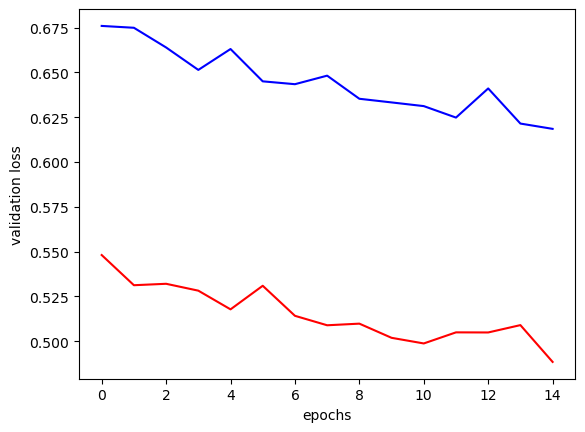

In [32]:
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel("epochs")
plt.ylabel("validation loss")
plt.show()
